# Problem Definition

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

## Questions
1: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

2: What metric would you report for this dataset?

3: What is its value?


In [198]:
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
# CSV read into Pandas dataFrame
order_data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
# Reordering the data in decending order of 'order_amount'
order_data_sorted = order_data.sort_values(by=["order_amount"], ascending=False)
order_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [160]:
aov_predicted = 3145.13
aov_mean = round(order_data["order_amount"].mean(), 2)
aov_mode = round(order_data["order_amount"].mode()[0], 2)
aov_median = round(order_data_sorted["order_amount"].median(), 2)

print("--------------------\n"
     + "Average Order Value\n"
     + "--------------------\n"
     + "Predicted: " + str(aov_predicted)
     + "\nMean: " + str(aov_mean)
     + "\nMedian: " + str(aov_median)
     + "\nMode: " + str(aov_mode)
     )

--------------------
Average Order Value
--------------------
Predicted: 3145.13
Mean: 3145.13
Median: 284.0
Mode: 153


# Plotting the Data

As we can see, the mean value calculated matches the predicted value, one much higher than expected for this type of data. If we plot the data, is is clear that the majority of datapoints sit far below $10,000, however there are a number of very high and very consistent datapoints which may be impacting our average result

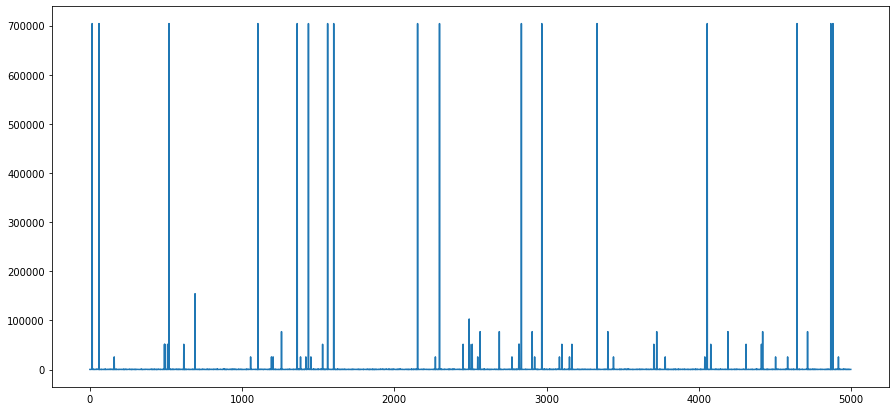

In [211]:
plt.subplots(figsize=(15, 7))
order_data["order_amount"].plot()
plt.show()

# Sorting the Dataset

When looking at the sorted data, it is clear to see that there are 17 large value orders which all share the same following field values:
- shop_id = 42

- user_id = 607

- order_amount = 70400

- total_items = 2000

- payment_method = credit card

All of these transactions share a timestamp of 4:00:00 on their respective dates and there are even some fully identical Date/Time stamps ( eg. 2017-03-02 4:00:00 )

These factors lead me to believe that these transactions are most likely erroneous.

There is a possiblity that they are scheduled, regular b2b (Business to Business) purchases, however this would be easily verifiable in a real-world scenario. 

In [178]:
order_data_sorted.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


# Remove Erroneous Data
By curring the erroneous data cut from the system, we can now recalculate our AOV results

In [180]:
order_data_cut = order_data_sorted.drop(order_data_sorted.index[0:17])

In [189]:
order_data_cut.head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35
4192,4193,78,787,77175,3,credit_card,2017-03-18 9:25:32
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05
2690,2691,78,962,77175,3,debit,2017-03-22 7:33:25
2564,2565,78,915,77175,3,debit,2017-03-25 1:19:35
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


In [185]:
aov_mean2 = round(order_data_cut["order_amount"].mean(), 2)
aov_mode2 = round(order_data_cut["order_amount"].mode()[0], 2)
aov_median2 = round(order_data_cut["order_amount"].median(), 2)

print("--------------------\n"
     + "Average Order Value\n"
     + "--------------------\n"
     + "Predicted: " + str(aov_predicted)
     + "\nMean: " + str(aov_mean2)
     + "\nMedian: " + str(aov_median2)
     + "\nMode: " + str(aov_mode2)
     )

--------------------
Average Order Value
--------------------
Predicted: 3145.13
Mean: 754.09
Median: 284.0
Mode: 153


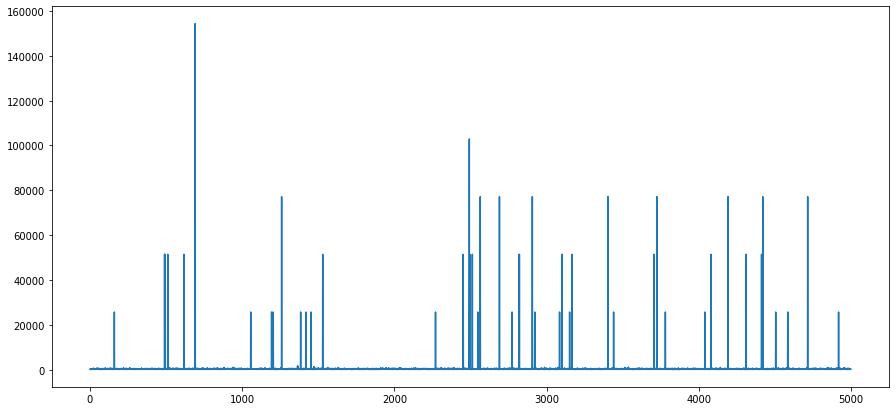

In [218]:
plt.subplots(figsize=(15, 7))
order_data_cut.sort_values(by=["order_id"], ascending=True)["order_amount"].plot()
plt.show()

# Cleaning the Data

Although our mean value has significantly dropped, it is still much higher than expected, compared with our Median and Mode calculations.

When looking at our remaining high-value orders, it is clear that all originate from Shop 78 and have order amounts which are a factor of 100 higher than most other results in the dataset. 

In [195]:
154350 / 6

25725.0

In [196]:
102900 / 4

25725.0

In [197]:
77175 / 3

25725.0

As stated above, each shop only sells one style of shoe. Although each of these values for one shoe are consistent, they appear to be a factor fo 100 too high. It can be presumed that a pair of sneakers costs $257.25  instead of the #25,725 calculated above. It is important for us to clean the data by ammending these errors in order to get an accurate AOV across the set.


In [220]:
order_data_cut[]

order_id
shop_id
user_id
order_amount
total_items
payment_method
created_at
